<a href="https://colab.research.google.com/github/likaiwen1128/colab/blob/master/voting_and_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [0]:
from sklearn.model_selection import validation_curve

In [0]:
income=pd.read_csv("https://raw.githubusercontent.com/jordanbean/Starbucks-Location-Mapping/master/acs2015_county_data.csv")
income.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [0]:
star=pd.read_csv("https://raw.githubusercontent.com/tejaykodali/starbucks-locations/master/All_Starbucks_Locations_in_the_US_-_Map.csv")
star.head()

,Brand,Store Number,Name,Ownership Type,Facility ID,Features - Products,Features - Service,Features - Stations,Food Region,Venue Type,...,Street Line 1,Street Line 2,City,State,Zip,Country,Coordinates,Latitude,Longitude,Insert Date
0,Starbucks,11854,Epping Main St,Company Owned,18228,"Lunch, Oven-warmed Food, Reserve Amenity","Starbucks Card Mobile, Wireless Hotspot",Drive-Through,9999,Unknown,...,96 Calef Highway,NaN,Epping,NH,03042-2224,US,"(43.031873, -71.073203)",43.031873,-71.073203,06/22/2012 06:17:10 PM
1,Starbucks,79420,Stop & Shop-Exeter #204,Licensed,9956,NaN,Wireless Hotspot,NaN,9999,Unknown,...,139 Portsmouth Ave,NaN,Exeter,NH,03833-2105,US,"(42.989763, -70.932044)",42.989763,-70.932044,06/22/2012 06:17:10 PM
2,Starbucks,3872,Target Greenland T-2530,Licensed,10933,NaN,Starbucks Card Mobile,NaN,9999,Unknown,...,1450 Greenland Rd,NaN,Greenland,NH,03840-2438,US,"(43.04871, -70.816345)",43.048710,-70.816345,06/22/2012 06:17:10 PM
3,Starbucks,13448,"Seabrook, Lafayette Rd",Company Owned,16980,"Lunch, Oven-warmed Food, Reserve Amenity, Sire...","Starbucks Card Mobile, Wireless Hotspot",Drive-Through,9999,Unknown,...,271 Lafayette Rd,NaN,Seabrook,NH,03874-4512,US,"(42.882128, -70.86808)",42.882128,-70.868080,06/22/2012 06:17:10 PM
4,Starbucks,10325,"Portsmouth, Woodbury Avenue",Company Owned,17269,"Lunch, Oven-warmed Food, Reserve Amenity","Starbucks Card Mobile, Wireless Hotspot",Drive-Through,9999,Unknown,...,1855 Woodbury Avenue,NaN,Portsmouth,NH,03801-3228,US,"(43.092318, -70.792327)",43.092318,-70.792327,06/22/2012 06:17:10 PM


In [0]:
star.columns

Index(['Brand', 'Store Number', 'Name', 'Ownership Type', 'Facility ID',
       'Features - Products', 'Features - Service', 'Features - Stations',
       'Food Region', 'Venue Type', 'Phone Number', 'Location',
       'Street Address', 'Street Line 1', 'Street Line 2', 'City', 'State',
       'Zip', 'Country', 'Coordinates', 'Latitude', 'Longitude',
       'Insert Date'],
      dtype='object')

In [0]:
vote = pd.read_csv("https://raw.githubusercontent.com/kosukeimai/qss/master/MEASUREMENT/unvoting.csv")
vote.head()

,Year,CountryAbb,CountryName,idealpoint,PctAgreeUS,PctAgreeRUSSIA
0,1946,USA,United States of America,1.713689,1.0,0.214286
1,1947,USA,United States of America,1.812884,1.0,0.263158
2,1948,USA,United States of America,1.936166,1.0,0.127451
3,1949,USA,United States of America,1.876619,1.0,0.111111
4,1950,USA,United States of America,1.810646,1.0,0.173077


In [0]:
pcus=np.array(vote.groupby('Year')['PctAgreeUS'].mean())

In [0]:
idp=pd.DataFrame()
idp['pcus']=pcus[:]
idp['yr']=vote.Year
idp.head()

,pcus,yr
0,0.584562,1946
1,0.621445,1947
2,0.577968,1948
3,0.540646,1949
4,0.634707,1950


In [0]:
X=idp.yr
y=idp.pcus

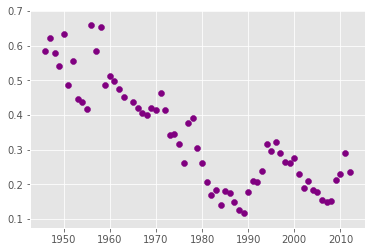

In [0]:
plt.scatter(X,y,c='purple')

In [0]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]

In [0]:
def Polyreg(deg=7, **kwargs):
  return make_pipeline(
      PolynomialFeatures(deg),
      LinearRegression( **kwargs)
  )

In [0]:
poly=Polyreg(deg=7)

In [0]:
yval=poly.fit(X,y).predict(X)

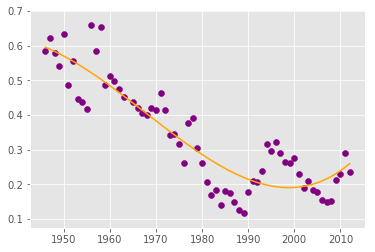

In [0]:
plt.scatter(X,y,c='purple')
plt.plot(X,yval,c='orange')

In [0]:
degree=np.arange(0, 10)
train_score, val_score = validation_curve(Polyreg(),X,y,
                                          'polynomialfeatures__degree',
                                          degree,
                                          cv=4)

In [0]:
train_score.shape

(10, 4)

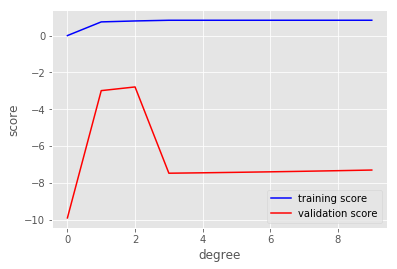

In [0]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')


plt.xlabel('degree')
plt.ylabel('score');

In [0]:
house=pd.read_csv("https://raw.githubusercontent.com/dennisdt/kc_house_price/master/kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
